In [ ]:
pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip -qq "/content/drive/MyDrive/dataset2.zip" -d dataset

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, models, datasets, utils
from torch.utils.data import Dataset
from torchsummary import summary
from torch.utils.data import DataLoader
from torchvision.utils import make_grid, save_image
from torchvision.datasets import DatasetFolder
import torch.optim as optim
from torch.optim.lr_scheduler import MultiStepLR, StepLR, ReduceLROnPlateau


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
from sklearn.metrics import f1_score
from PIL import Image
import argparse
import time




In [4]:
# 모델 학습 관련 파라미터 모음 --> 자유롭게 변경하고, 추가해보세요.

class Args():
  scheduler = "StepLR"
  model = "resnet"
  data_type="2d"
  n_class = 3
  epoch = 50
  model_path = "./model_weight_2d.pth"

args = Args()

In [5]:

#dataset

class ImageDataset(Dataset):
    def __init__(self, directory, transform=None):
        self.directory = directory
        self.transform = transform
        self.classes = sorted(os.listdir(directory))
        self.class_to_idx = {cls_name: idx for idx, cls_name in enumerate(self.classes)}
        self.samples = []

        for class_name in self.classes:
            class_dir = os.path.join(self.directory, class_name)
            for image_name in os.listdir(class_dir):
                self.samples.append((os.path.join(class_dir, image_name), self.class_to_idx[class_name]))


    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        image_path, label = self.samples[idx]
        image = Image.open(image_path).convert('RGB')

        if self.transform:
            image = self.transform(image)
        return image, label


100%|██████████| 5/5 [00:05<00:00,  1.11s/it]


Benign Epoch [1/50] Loss D: 0.33383405208587646, loss G: 9.996698379516602


100%|██████████| 5/5 [00:04<00:00,  1.14it/s]


Benign Epoch [2/50] Loss D: 0.18099245429039001, loss G: 12.157424926757812


100%|██████████| 5/5 [00:04<00:00,  1.13it/s]


Benign Epoch [3/50] Loss D: 0.02872888371348381, loss G: 11.37503719329834


100%|██████████| 5/5 [00:04<00:00,  1.10it/s]


Benign Epoch [4/50] Loss D: 0.0305449441075325, loss G: 14.195140838623047


100%|██████████| 5/5 [00:04<00:00,  1.19it/s]


Benign Epoch [5/50] Loss D: 0.014080663211643696, loss G: 17.876432418823242


100%|██████████| 5/5 [00:04<00:00,  1.11it/s]


Benign Epoch [6/50] Loss D: 0.016082189977169037, loss G: 18.007770538330078


100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


Benign Epoch [7/50] Loss D: 0.0005342312506400049, loss G: 8.706372261047363


100%|██████████| 5/5 [00:03<00:00,  1.26it/s]


Benign Epoch [8/50] Loss D: 0.001080284477211535, loss G: 16.31332778930664


100%|██████████| 5/5 [00:04<00:00,  1.05it/s]


Benign Epoch [9/50] Loss D: 0.003932403866201639, loss G: 14.269792556762695


100%|██████████| 5/5 [00:03<00:00,  1.26it/s]


Benign Epoch [10/50] Loss D: 0.009503807872533798, loss G: 17.658241271972656


100%|██████████| 5/5 [00:03<00:00,  1.27it/s]


Benign Epoch [11/50] Loss D: 0.21251344680786133, loss G: 21.0275821685791


100%|██████████| 5/5 [00:04<00:00,  1.07it/s]


Benign Epoch [12/50] Loss D: 0.0005037434748373926, loss G: 20.657142639160156


100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


Benign Epoch [13/50] Loss D: 9.185051749227569e-05, loss G: 19.836584091186523


100%|██████████| 5/5 [00:03<00:00,  1.27it/s]


Benign Epoch [14/50] Loss D: 2.330076131329406e-05, loss G: 18.620452880859375


100%|██████████| 5/5 [00:04<00:00,  1.17it/s]


Benign Epoch [15/50] Loss D: 6.649500573985279e-05, loss G: 15.915508270263672


100%|██████████| 5/5 [00:04<00:00,  1.12it/s]


Benign Epoch [16/50] Loss D: 0.0013685639714822173, loss G: 6.716551780700684


100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


Benign Epoch [17/50] Loss D: 0.0006216205656528473, loss G: 10.017205238342285


100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


Benign Epoch [18/50] Loss D: 0.01183390524238348, loss G: 7.4955291748046875


100%|██████████| 5/5 [00:04<00:00,  1.05it/s]


Benign Epoch [19/50] Loss D: 0.2785470187664032, loss G: 19.029293060302734


100%|██████████| 5/5 [00:03<00:00,  1.26it/s]


Benign Epoch [20/50] Loss D: 0.0043447972275316715, loss G: 18.626535415649414


100%|██████████| 5/5 [00:03<00:00,  1.26it/s]


Benign Epoch [21/50] Loss D: 0.010385232046246529, loss G: 16.95343017578125


100%|██████████| 5/5 [00:04<00:00,  1.04it/s]


Benign Epoch [22/50] Loss D: 0.00018790211470331997, loss G: 15.15528678894043


100%|██████████| 5/5 [00:04<00:00,  1.25it/s]


Benign Epoch [23/50] Loss D: 0.0006732819019816816, loss G: 12.904646873474121


100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


Benign Epoch [24/50] Loss D: 0.00031853688415139914, loss G: 9.732538223266602


100%|██████████| 5/5 [00:04<00:00,  1.08it/s]


Benign Epoch [25/50] Loss D: 0.09851943701505661, loss G: 4.482037544250488


100%|██████████| 5/5 [00:04<00:00,  1.21it/s]


Benign Epoch [26/50] Loss D: 0.012842103838920593, loss G: 15.281331062316895


100%|██████████| 5/5 [00:03<00:00,  1.25it/s]


Benign Epoch [27/50] Loss D: 0.0025169062428176403, loss G: 13.337400436401367


100%|██████████| 5/5 [00:04<00:00,  1.16it/s]


Benign Epoch [28/50] Loss D: 0.446501761674881, loss G: 19.29334831237793


100%|██████████| 5/5 [00:04<00:00,  1.09it/s]


Benign Epoch [29/50] Loss D: 0.0019347654888406396, loss G: 14.444738388061523


100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


Benign Epoch [30/50] Loss D: 0.12590698897838593, loss G: 4.316897392272949


100%|██████████| 5/5 [00:04<00:00,  1.16it/s]


Benign Epoch [31/50] Loss D: 0.008039556443691254, loss G: 7.354621887207031


100%|██████████| 5/5 [00:04<00:00,  1.08it/s]


Benign Epoch [32/50] Loss D: 0.0026686680503189564, loss G: 7.227066993713379


100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


Benign Epoch [33/50] Loss D: 0.10842902958393097, loss G: 5.097639083862305


100%|██████████| 5/5 [00:04<00:00,  1.03it/s]


Benign Epoch [34/50] Loss D: 0.007671481929719448, loss G: 8.88649845123291


100%|██████████| 5/5 [00:04<00:00,  1.05it/s]


Benign Epoch [35/50] Loss D: 0.036573074758052826, loss G: 8.011700630187988


100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


Benign Epoch [36/50] Loss D: 0.008496720343828201, loss G: 6.49191427230835


100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


Benign Epoch [37/50] Loss D: 0.02936561405658722, loss G: 5.430922985076904


100%|██████████| 5/5 [00:05<00:00,  1.01s/it]


Benign Epoch [38/50] Loss D: 0.020462166517972946, loss G: 7.233824729919434


100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


Benign Epoch [39/50] Loss D: 0.04429791122674942, loss G: 7.49066162109375


100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


Benign Epoch [40/50] Loss D: 0.03298827260732651, loss G: 6.775081634521484


100%|██████████| 5/5 [00:04<00:00,  1.04it/s]


Benign Epoch [41/50] Loss D: 0.0220793504267931, loss G: 7.875267028808594


100%|██████████| 5/5 [00:04<00:00,  1.21it/s]


Benign Epoch [42/50] Loss D: 0.030677758157253265, loss G: 9.805798530578613


100%|██████████| 5/5 [00:04<00:00,  1.21it/s]


Benign Epoch [43/50] Loss D: 0.052624695003032684, loss G: 9.396153450012207


100%|██████████| 5/5 [00:04<00:00,  1.08it/s]


Benign Epoch [44/50] Loss D: 0.05140285938978195, loss G: 7.62042236328125


100%|██████████| 5/5 [00:04<00:00,  1.14it/s]


Benign Epoch [45/50] Loss D: 0.07114782184362411, loss G: 7.345860004425049


100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


Benign Epoch [46/50] Loss D: 0.0197707898914814, loss G: 7.895960807800293


100%|██████████| 5/5 [00:04<00:00,  1.12it/s]


Benign Epoch [47/50] Loss D: 0.07314601540565491, loss G: 8.619213104248047


100%|██████████| 5/5 [00:04<00:00,  1.11it/s]


Benign Epoch [48/50] Loss D: 0.021743889898061752, loss G: 9.356488227844238


100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


Benign Epoch [49/50] Loss D: 0.009331902489066124, loss G: 9.24885368347168


100%|██████████| 5/5 [00:04<00:00,  1.19it/s]


Benign Epoch [50/50] Loss D: 0.015271228738129139, loss G: 9.277629852294922


100%|██████████| 3/3 [00:02<00:00,  1.22it/s]


Malignant Epoch [1/50] Loss D: 0.20618297159671783, loss G: 11.443114280700684


100%|██████████| 3/3 [00:01<00:00,  1.55it/s]


Malignant Epoch [2/50] Loss D: 0.37625178694725037, loss G: 12.845511436462402


100%|██████████| 3/3 [00:01<00:00,  1.54it/s]


Malignant Epoch [3/50] Loss D: 0.0620584599673748, loss G: 9.751667976379395


100%|██████████| 3/3 [00:01<00:00,  1.54it/s]


Malignant Epoch [4/50] Loss D: 0.030030101537704468, loss G: 10.974745750427246


100%|██████████| 3/3 [00:01<00:00,  1.57it/s]


Malignant Epoch [5/50] Loss D: 0.004188568331301212, loss G: 13.887370109558105


100%|██████████| 3/3 [00:01<00:00,  1.57it/s]


Malignant Epoch [6/50] Loss D: 0.02399921789765358, loss G: 13.275161743164062


100%|██████████| 3/3 [00:02<00:00,  1.25it/s]


Malignant Epoch [7/50] Loss D: 0.7638036012649536, loss G: 12.825639724731445


100%|██████████| 3/3 [00:02<00:00,  1.40it/s]


Malignant Epoch [8/50] Loss D: 0.007384806405752897, loss G: 16.863994598388672


100%|██████████| 3/3 [00:01<00:00,  1.58it/s]


Malignant Epoch [9/50] Loss D: 0.004820692352950573, loss G: 16.578672409057617


100%|██████████| 3/3 [00:01<00:00,  1.56it/s]


Malignant Epoch [10/50] Loss D: 0.03900930657982826, loss G: 12.82605266571045


100%|██████████| 3/3 [00:01<00:00,  1.57it/s]


Malignant Epoch [11/50] Loss D: 0.0010404513450339437, loss G: 16.686386108398438


100%|██████████| 3/3 [00:01<00:00,  1.57it/s]


Malignant Epoch [12/50] Loss D: 0.06208185851573944, loss G: 19.198820114135742


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


Malignant Epoch [13/50] Loss D: 0.18282997608184814, loss G: 19.102237701416016


100%|██████████| 3/3 [00:02<00:00,  1.27it/s]


Malignant Epoch [14/50] Loss D: 0.0012513009132817388, loss G: 17.668304443359375


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


Malignant Epoch [15/50] Loss D: 0.000877933984156698, loss G: 14.097160339355469


100%|██████████| 3/3 [00:01<00:00,  1.56it/s]


Malignant Epoch [16/50] Loss D: 1.1616859436035156, loss G: 11.805472373962402


100%|██████████| 3/3 [00:01<00:00,  1.57it/s]


Malignant Epoch [17/50] Loss D: 0.0020112404599785805, loss G: 16.8216552734375


100%|██████████| 3/3 [00:01<00:00,  1.51it/s]


Malignant Epoch [18/50] Loss D: 0.002726018661633134, loss G: 17.26287841796875


100%|██████████| 3/3 [00:01<00:00,  1.56it/s]


Malignant Epoch [19/50] Loss D: 0.0005288044922053814, loss G: 16.342132568359375


100%|██████████| 3/3 [00:02<00:00,  1.40it/s]


Malignant Epoch [20/50] Loss D: 0.0022243259008973837, loss G: 14.648480415344238


100%|██████████| 3/3 [00:02<00:00,  1.25it/s]


Malignant Epoch [21/50] Loss D: 0.04966188967227936, loss G: 10.7410249710083


100%|██████████| 3/3 [00:01<00:00,  1.55it/s]


Malignant Epoch [22/50] Loss D: 0.6643456220626831, loss G: 7.104545593261719


100%|██████████| 3/3 [00:01<00:00,  1.56it/s]


Malignant Epoch [23/50] Loss D: 0.002286786213517189, loss G: 11.383195877075195


100%|██████████| 3/3 [00:01<00:00,  1.57it/s]


Malignant Epoch [24/50] Loss D: 0.04253172129392624, loss G: 7.875491619110107


100%|██████████| 3/3 [00:01<00:00,  1.57it/s]


Malignant Epoch [25/50] Loss D: 0.003081000642850995, loss G: 12.980247497558594


100%|██████████| 3/3 [00:01<00:00,  1.55it/s]


Malignant Epoch [26/50] Loss D: 0.006071875337511301, loss G: 12.573185920715332


100%|██████████| 3/3 [00:02<00:00,  1.36it/s]


Malignant Epoch [27/50] Loss D: 0.02172071859240532, loss G: 10.737198829650879


100%|██████████| 3/3 [00:02<00:00,  1.18it/s]


Malignant Epoch [28/50] Loss D: 0.015104538761079311, loss G: 8.281328201293945


100%|██████████| 3/3 [00:01<00:00,  1.56it/s]


Malignant Epoch [29/50] Loss D: 0.006398552563041449, loss G: 5.448084831237793


100%|██████████| 3/3 [00:01<00:00,  1.52it/s]


Malignant Epoch [30/50] Loss D: 0.09683321416378021, loss G: 4.632195949554443


100%|██████████| 3/3 [00:01<00:00,  1.56it/s]


Malignant Epoch [31/50] Loss D: 0.012155124917626381, loss G: 7.1497039794921875


100%|██████████| 3/3 [00:01<00:00,  1.57it/s]


Malignant Epoch [32/50] Loss D: 0.025773214176297188, loss G: 7.356289863586426


100%|██████████| 3/3 [00:01<00:00,  1.54it/s]


Malignant Epoch [33/50] Loss D: 0.0026247866917401552, loss G: 10.711567878723145


100%|██████████| 3/3 [00:02<00:00,  1.25it/s]


Malignant Epoch [34/50] Loss D: 0.07114189863204956, loss G: 8.655926704406738


100%|██████████| 3/3 [00:02<00:00,  1.30it/s]


Malignant Epoch [35/50] Loss D: 0.03446396812796593, loss G: 11.833486557006836


100%|██████████| 3/3 [00:01<00:00,  1.57it/s]


Malignant Epoch [36/50] Loss D: 0.003124033100903034, loss G: 10.362509727478027


100%|██████████| 3/3 [00:01<00:00,  1.56it/s]


Malignant Epoch [37/50] Loss D: 0.00594571465626359, loss G: 6.508256435394287


100%|██████████| 3/3 [00:01<00:00,  1.57it/s]


Malignant Epoch [38/50] Loss D: 0.018341856077313423, loss G: 7.955499172210693


100%|██████████| 3/3 [00:01<00:00,  1.57it/s]


Malignant Epoch [39/50] Loss D: 0.002016253536567092, loss G: 8.682085037231445


100%|██████████| 3/3 [00:01<00:00,  1.55it/s]


Malignant Epoch [40/50] Loss D: 0.009230837225914001, loss G: 6.702404975891113


100%|██████████| 3/3 [00:02<00:00,  1.25it/s]


Malignant Epoch [41/50] Loss D: 0.015806861221790314, loss G: 8.793312072753906


100%|██████████| 3/3 [00:02<00:00,  1.38it/s]


Malignant Epoch [42/50] Loss D: 0.003884474979713559, loss G: 9.049233436584473


100%|██████████| 3/3 [00:01<00:00,  1.55it/s]


Malignant Epoch [43/50] Loss D: 0.026424000039696693, loss G: 14.969012260437012


100%|██████████| 3/3 [00:01<00:00,  1.57it/s]


Malignant Epoch [44/50] Loss D: 0.18039798736572266, loss G: 16.74936294555664


100%|██████████| 3/3 [00:01<00:00,  1.56it/s]


Malignant Epoch [45/50] Loss D: 0.0009171207784675062, loss G: 16.390539169311523


100%|██████████| 3/3 [00:01<00:00,  1.57it/s]


Malignant Epoch [46/50] Loss D: 0.005111456383019686, loss G: 15.33928108215332


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Malignant Epoch [47/50] Loss D: 0.002161177573725581, loss G: 14.052273750305176


100%|██████████| 3/3 [00:02<00:00,  1.19it/s]


Malignant Epoch [48/50] Loss D: 0.004518379922956228, loss G: 11.617715835571289


100%|██████████| 3/3 [00:02<00:00,  1.38it/s]


Malignant Epoch [49/50] Loss D: 0.0018394328653812408, loss G: 6.856680393218994


100%|██████████| 3/3 [00:01<00:00,  1.56it/s]


Malignant Epoch [50/50] Loss D: 0.0010287131881341338, loss G: 12.989596366882324


 50%|█████     | 1/2 [00:00<00:00,  1.02it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:952: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv_transpose2d(
100%|██████████| 2/2 [00:01<00:00,  1.53it/s]


Normal Epoch [1/50] Loss D: 1.7668893337249756, loss G: 7.9020209312438965


100%|██████████| 2/2 [00:01<00:00,  1.56it/s]


Normal Epoch [2/50] Loss D: 0.09875854104757309, loss G: 8.218005180358887


100%|██████████| 2/2 [00:01<00:00,  1.18it/s]


Normal Epoch [3/50] Loss D: 0.775635838508606, loss G: 10.361921310424805


100%|██████████| 2/2 [00:03<00:00,  1.68s/it]


Normal Epoch [4/50] Loss D: 0.15052595734596252, loss G: 9.710450172424316


100%|██████████| 2/2 [00:02<00:00,  1.46s/it]


Normal Epoch [5/50] Loss D: 0.06241745501756668, loss G: 11.800100326538086


100%|██████████| 2/2 [00:01<00:00,  1.30it/s]


Normal Epoch [6/50] Loss D: 0.15223240852355957, loss G: 11.296921730041504


100%|██████████| 2/2 [00:01<00:00,  1.56it/s]


Normal Epoch [7/50] Loss D: 0.021426193416118622, loss G: 10.790377616882324


100%|██████████| 2/2 [00:01<00:00,  1.49it/s]


Normal Epoch [8/50] Loss D: 0.18330731987953186, loss G: 12.411493301391602


100%|██████████| 2/2 [00:01<00:00,  1.55it/s]


Normal Epoch [9/50] Loss D: 0.042225372046232224, loss G: 14.27382755279541


100%|██████████| 2/2 [00:01<00:00,  1.57it/s]


Normal Epoch [10/50] Loss D: 0.016043158248066902, loss G: 12.870384216308594


100%|██████████| 2/2 [00:01<00:00,  1.56it/s]


Normal Epoch [11/50] Loss D: 0.031232688575983047, loss G: 7.717729091644287


100%|██████████| 2/2 [00:01<00:00,  1.57it/s]


Normal Epoch [12/50] Loss D: 0.03741706907749176, loss G: 16.421401977539062


100%|██████████| 2/2 [00:01<00:00,  1.54it/s]


Normal Epoch [13/50] Loss D: 0.12229946255683899, loss G: 18.264789581298828


100%|██████████| 2/2 [00:01<00:00,  1.22it/s]


Normal Epoch [14/50] Loss D: 0.05792070925235748, loss G: 18.576784133911133


100%|██████████| 2/2 [00:01<00:00,  1.18it/s]


Normal Epoch [15/50] Loss D: 0.005150246899574995, loss G: 18.238195419311523


100%|██████████| 2/2 [00:01<00:00,  1.37it/s]


Normal Epoch [16/50] Loss D: 0.0036628663074225187, loss G: 17.389602661132812


100%|██████████| 2/2 [00:01<00:00,  1.55it/s]


Normal Epoch [17/50] Loss D: 0.0005317325703799725, loss G: 16.02402114868164


100%|██████████| 2/2 [00:01<00:00,  1.54it/s]


Normal Epoch [18/50] Loss D: 0.00028253509663045406, loss G: 13.63538932800293


100%|██████████| 2/2 [00:01<00:00,  1.55it/s]


Normal Epoch [19/50] Loss D: 0.002061509992927313, loss G: 7.661172866821289


100%|██████████| 2/2 [00:01<00:00,  1.56it/s]


Normal Epoch [20/50] Loss D: 0.0018770105671137571, loss G: 15.672639846801758


100%|██████████| 2/2 [00:01<00:00,  1.54it/s]


Normal Epoch [21/50] Loss D: 0.009587560780346394, loss G: 18.048063278198242


100%|██████████| 2/2 [00:01<00:00,  1.57it/s]


Normal Epoch [22/50] Loss D: 0.00744442455470562, loss G: 18.829458236694336


100%|██████████| 2/2 [00:01<00:00,  1.39it/s]


Normal Epoch [23/50] Loss D: 0.017670486122369766, loss G: 18.911334991455078


100%|██████████| 2/2 [00:02<00:00,  1.36s/it]


Normal Epoch [24/50] Loss D: 0.01515643298625946, loss G: 18.721023559570312


100%|██████████| 2/2 [00:01<00:00,  1.28it/s]


Normal Epoch [25/50] Loss D: 0.021315673366189003, loss G: 18.353307723999023


100%|██████████| 2/2 [00:01<00:00,  1.55it/s]


Normal Epoch [26/50] Loss D: 0.014993603341281414, loss G: 17.74947738647461


100%|██████████| 2/2 [00:01<00:00,  1.57it/s]


Normal Epoch [27/50] Loss D: 0.006492297630757093, loss G: 16.913305282592773


100%|██████████| 2/2 [00:01<00:00,  1.56it/s]


Normal Epoch [28/50] Loss D: 0.003666017670184374, loss G: 15.625995635986328


100%|██████████| 2/2 [00:01<00:00,  1.53it/s]


Normal Epoch [29/50] Loss D: 0.0005436306237243116, loss G: 13.243691444396973


100%|██████████| 2/2 [00:01<00:00,  1.57it/s]


Normal Epoch [30/50] Loss D: 0.0009548337548039854, loss G: 7.446041584014893


100%|██████████| 2/2 [00:01<00:00,  1.56it/s]


Normal Epoch [31/50] Loss D: 1.275431513786316, loss G: 7.438012599945068


100%|██████████| 2/2 [00:01<00:00,  1.51it/s]


Normal Epoch [32/50] Loss D: 0.0015289322473108768, loss G: 11.770251274108887


100%|██████████| 2/2 [00:01<00:00,  1.26it/s]


Normal Epoch [33/50] Loss D: 0.012163731269538403, loss G: 12.819622039794922


100%|██████████| 2/2 [00:01<00:00,  1.23it/s]


Normal Epoch [34/50] Loss D: 0.018704185262322426, loss G: 11.838315963745117


100%|██████████| 2/2 [00:01<00:00,  1.32it/s]


Normal Epoch [35/50] Loss D: 0.013272613286972046, loss G: 7.479053974151611


100%|██████████| 2/2 [00:01<00:00,  1.54it/s]


Normal Epoch [36/50] Loss D: 0.00851262453943491, loss G: 15.057297706604004


100%|██████████| 2/2 [00:01<00:00,  1.57it/s]


Normal Epoch [37/50] Loss D: 0.10552491992712021, loss G: 16.9299259185791


100%|██████████| 2/2 [00:01<00:00,  1.56it/s]


Normal Epoch [38/50] Loss D: 0.01651659980416298, loss G: 17.012697219848633


100%|██████████| 2/2 [00:01<00:00,  1.54it/s]


Normal Epoch [39/50] Loss D: 0.005316882394254208, loss G: 16.419937133789062


100%|██████████| 2/2 [00:01<00:00,  1.54it/s]


Normal Epoch [40/50] Loss D: 0.004885666538029909, loss G: 15.419706344604492


100%|██████████| 2/2 [00:01<00:00,  1.56it/s]


Normal Epoch [41/50] Loss D: 0.0038818742614239454, loss G: 14.004507064819336


100%|██████████| 2/2 [00:01<00:00,  1.45it/s]


Normal Epoch [42/50] Loss D: 0.0011500382097437978, loss G: 12.212198257446289


100%|██████████| 2/2 [00:01<00:00,  1.25it/s]


Normal Epoch [43/50] Loss D: 0.0011951506603509188, loss G: 10.001096725463867


100%|██████████| 2/2 [00:01<00:00,  1.24it/s]


Normal Epoch [44/50] Loss D: 0.0019023655913770199, loss G: 7.113757610321045


100%|██████████| 2/2 [00:01<00:00,  1.53it/s]


Normal Epoch [45/50] Loss D: 0.0366508848965168, loss G: 4.040705680847168


100%|██████████| 2/2 [00:01<00:00,  1.52it/s]


Normal Epoch [46/50] Loss D: 0.16656337678432465, loss G: 5.115891933441162


100%|██████████| 2/2 [00:01<00:00,  1.55it/s]


Normal Epoch [47/50] Loss D: 0.017396235838532448, loss G: 7.795498371124268


100%|██████████| 2/2 [00:01<00:00,  1.53it/s]


Normal Epoch [48/50] Loss D: 0.0058739930391311646, loss G: 9.19111442565918


100%|██████████| 2/2 [00:01<00:00,  1.51it/s]


Normal Epoch [49/50] Loss D: 0.018218185752630234, loss G: 8.47711181640625


100%|██████████| 2/2 [00:01<00:00,  1.55it/s]


Normal Epoch [50/50] Loss D: 0.027270741760730743, loss G: 6.497248649597168


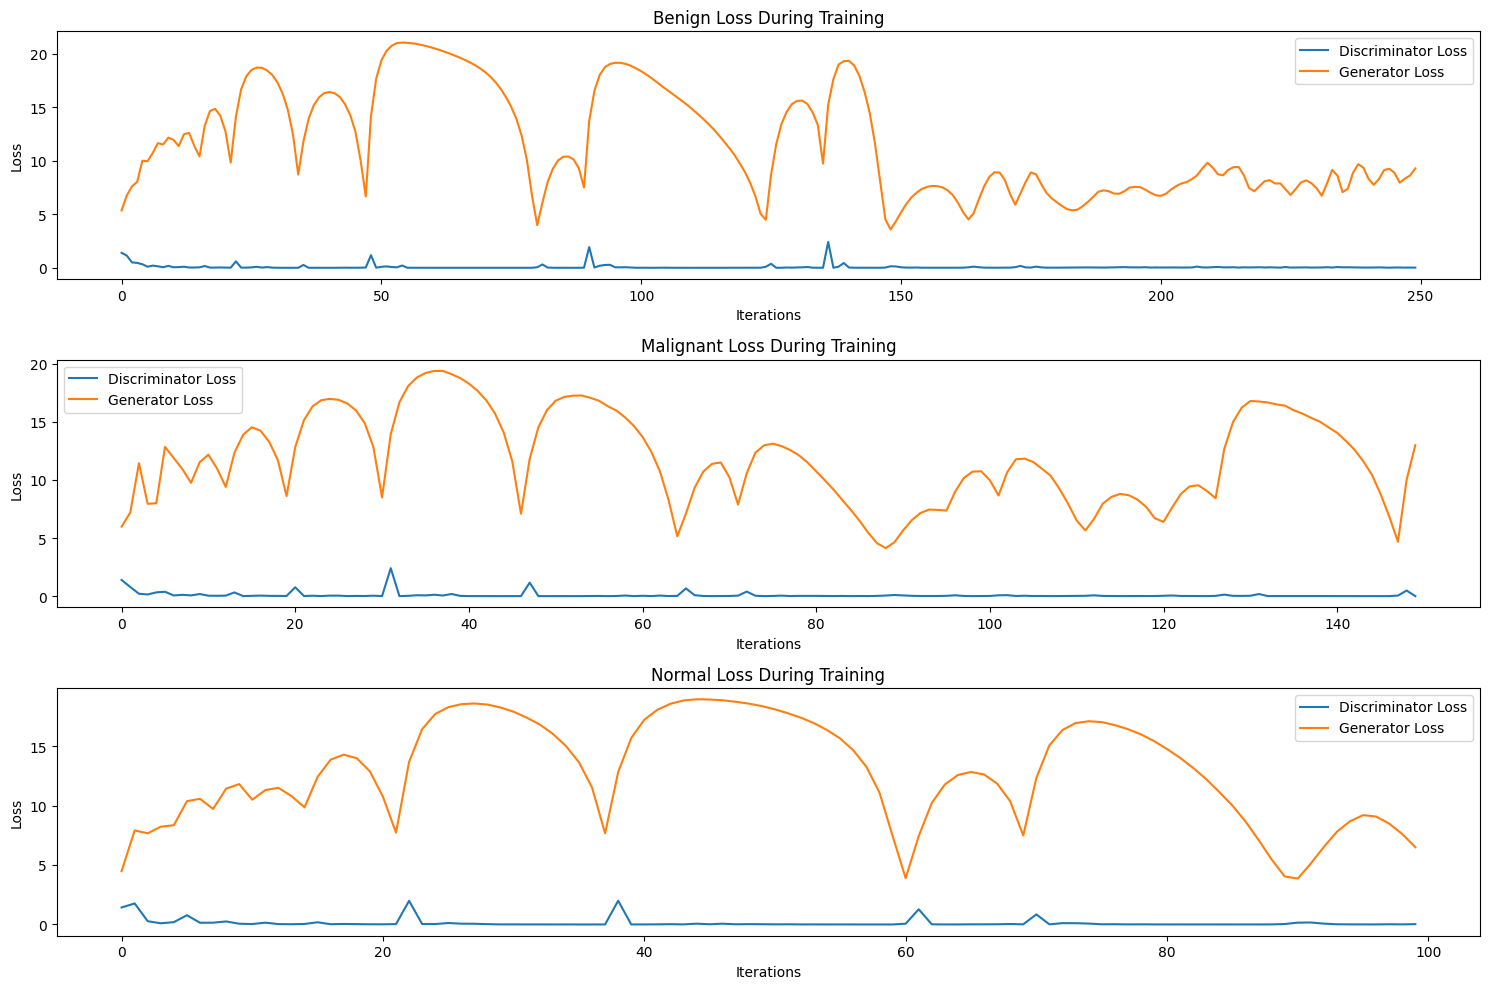

In [ ]:
# CNN 기반의 GAN 모델 정의
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # 입력은 noise_dim
            nn.ConvTranspose2d(100, 1024, 4, 1, 0, bias=False),
            nn.BatchNorm2d(1024),
            nn.ReLU(True),
            nn.ConvTranspose2d(1024, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 1, 4, 4, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input.view(input.size(0), 100, 1, 1))

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # 입력은 3x224x224 이미지
            nn.Conv2d(1, 32, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(32, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 1024, 4, 2, 1, bias=False),
            nn.BatchNorm2d(1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(1024, 1, 3, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input).view(-1,1)

# 커스텀 데이터셋 클래스 정의
class CustomDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith('.png')]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('L')
        if self.transform:
            image = self.transform(image)
        return image


# 학습을 위한 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 64
lr = 0.0002
epochs = 50
noise_dim = 100
dataset_path = './dataset'

# 데이터셋 변환 및 로더
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])



# 각 클래스별로 GAN을 학습하고 데이터 증강
class_names = ['benign', 'malignant', 'normal']
losses = {'benign': {'D': [], 'G': []}, 'malignant': {'D': [], 'G': []}, 'normal': {'D': [], 'G': []}}


def train_gan_for_class(class_name):
    class_path = os.path.join(dataset_path, 'train', class_name)
    dataset = CustomDataset(image_dir=class_path, transform=transform)
    dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

    G = Generator().to(device)
    D = Discriminator().to(device)

    criterion = nn.BCELoss()
    optimizerD = optim.Adam(D.parameters(), lr=lr)
    optimizerG = optim.Adam(G.parameters(), lr=lr)


    for epoch in range(epochs):
        for i, (data) in enumerate(tqdm(dataloader)):
            real = data.to(device)
            batch_size = real.size(0)
            labels_real = torch.ones(batch_size, 1).to(device)

            labels_fake = torch.zeros(batch_size, 1).to(device)

            # Discriminator 학습
            optimizerD.zero_grad()
            # print(real.shape)
            output_real = D(real)

            # print(labels_real.shape)
            # print(output_real.shape)

            loss_real = criterion(output_real, labels_real)

            noise = torch.randn(batch_size, noise_dim, 1, 1).to(device)
            fake = G(noise)
            # print("fake shape", fake.shape)
            output_fake = D(fake.detach())
            loss_fake = criterion(output_fake, labels_fake)

            loss_D = loss_real + loss_fake
            loss_D.backward()
            optimizerD.step()

            # Generator 학습
            optimizerG.zero_grad()
            output_fake = D(fake)
            loss_G = criterion(output_fake, labels_real)

            loss_G.backward()
            optimizerG.step()

            # 손실 기록
            losses[class_name]['D'].append(loss_D.item())
            losses[class_name]['G'].append(loss_G.item())

        print(f'{class_name.capitalize()} Epoch [{epoch+1}/{epochs}] Loss D: {loss_D.item()}, loss G: {loss_G.item()}')
        # print(f'Phase [{phase}] Epoch [{epoch+1}/{epochs}] Loss D: {loss_D.item()}, loss G: {loss_G.item()}')

        # 이미지 저장
        if (epoch + 1) % 10 == 0:
            with torch.no_grad():
                fake_images = G(noise).detach().cpu()
                for j, image in enumerate(fake_images):
                    save_path = os.path.join(dataset_path, 'train', class_name, f'fake_image_epoch_{epoch+1}_{j}.png')
                    save_image(image, save_path, normalize=True)

for class_name in class_names:
    train_gan_for_class(class_name)

# 손실 그래프 그리기
plt.figure(figsize=(15, 10))

for i, class_name in enumerate(class_names):
    plt.subplot(3, 1, i + 1)
    plt.title(f"{class_name.capitalize()} Loss During Training")
    plt.plot(losses[class_name]['D'], label="Discriminator Loss")
    plt.plot(losses[class_name]['G'], label="Generator Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend()

plt.tight_layout()
plt.show()



In [6]:
import os
from torchvision import datasets, transforms

class ImageDatasetCounter:
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform or transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
        ])

    def count_images_per_class(self, dataset_type):
        dataset_path = os.path.join(self.data_dir, dataset_type)
        image_dataset = datasets.ImageFolder(dataset_path, transform=self.transform)

        class_names = image_dataset.classes
        class_counts = {class_name: 0 for class_name in class_names}

        for _, label in image_dataset:
            class_name = class_names[label]
            class_counts[class_name] += 1

        counts_list = [class_counts[class_name] for class_name in class_names]
        return counts_list

    def count_all_datasets(self, dataset_types):
        counts = {}
        for dataset_type in dataset_types:
            counts[dataset_type] = self.count_images_per_class(dataset_type)
        return counts

# 사용 예시
data_dir = '/content/dataset'
dataset_types = ['train', 'validation', 'test']
counter = ImageDatasetCounter(data_dir)

counts = counter.count_all_datasets(dataset_types)
for dataset_type, count_list in counts.items():
    print(f"{dataset_type} dataset: {count_list} total : {sum(count_list)}")


train dataset: [278, 133, 83] total : 494
validation dataset: [71, 34, 22] total : 127
test dataset: [88, 43, 28] total : 159


In [7]:
def get_model(name, n_class, pretrained=False):
    if name == 'vgg19':
        model = models.vgg19(pretrained=pretrained)
        num_features = model.classifier[3].in_features
        model.classifier[3] = nn.Linear(num_features, n_class)
    elif name == 'resnet':
        model = models.resnet18(pretrained=pretrained)
        num_features = model.fc.in_features
        model.fc = nn.Linear(num_features, n_class)


class CustomCNN(nn.Module):
      def __init__(self):
          super(Simple2DCNN, self).__init__()
          self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
          self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
          self.conv2_1 = nn.Conv2d(64, 64, kernel_size=3, padding=1)

          self.downsample = nn.Conv2d(32,64,(1,1),stride=2,padding=0)

          self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1)
          self.conv3_1 = nn.Conv2d(128, 128, kernel_size=3, stride=2, padding=1)
          self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1)
          self.conv4_1 = nn.Conv2d(256, 256, kernel_size=3, stride=2, padding=1)
          self.conv5 = nn.Conv2d(256, 512, kernel_size=3, stride=2, padding=1)
          self.adaptive_pool = nn.AdaptiveAvgPool2d(1)
          self.pool = nn.MaxPool2d(3,stride=2,padding=1)
          self.relu = nn.ReLU()
          self.fc = nn.Linear(512*1*1, 3)  # Adaptive Pooling 이후의 출력 크기에 맞춰 조정

      def forward(self, x):
          x = self.pool(self.conv1(x))
          skip_x_1=x
        #   print(x.shape)
          skip_x_1=self.downsample(skip_x_1)
        #   print(skip_x_1.shape)
          x = self.relu(self.conv2(x))
          x = self.conv2_1(x)
        #   print(x.shape)
          x=skip_x_1+x

          x = self.relu(self.conv3(x))
          x = self.relu(self.conv4(x))
          x = self.relu(self.conv5(x))
          x = self.adaptive_pool(x)
          x = x.view(-1, 512*1*1)  # 적절한 크기로 플래트닝
          x = self.fc(x)
          return x

class Simple2DCNN(nn.Module):
    def __init__(self):
        super(Simple2DCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.adaptive_pool = nn.AdaptiveAvgPool2d(10)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()
        self.fc = nn.Linear(256*200*200, 3)  # Adaptive Pooling 이후의 출력 크기에 맞춰 조정

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.relu(self.conv4(x))
        x = self.adaptive_pool(x)
        x = x.view(-1, 256*200*200)  # 적절한 크기로 플래트닝
        x = self.fc(x)
        return x



In [8]:
def get_model(num_classes):
    try:
        # Pretrained resnet18 모델 불러오기
        model = models.resnet18(pretrained=False)
        # 마지막 레이어 수정
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, num_classes)
        return model
    except Exception as e:
        print(f"Error in model creation: {e}")
        return None
# GPU가 사용 가능한지 확인
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


# 모델 생성
model = get_model(num_classes=3)

# model = get_model(args.model, args.n_class, pretrained=True)
if model is None:
    print("Model creation failed")
else:
    print("Model created successfully")
    model = model.to(device)
    summary(model, (3, 224, 224))



Using device: cuda:0
Model created successfully


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [9]:
import torch
import torch.nn as nn
from torchvision import models
from torchsummary import summary

def get_model2(num_classes):
    try:
        # Pretrained vgg19 모델 불러오기
        model = models.vgg19(pretrained=True)
        # 마지막 레이어 수정
        num_ftrs = model.classifier[6].in_features
        model.classifier[6] = nn.Linear(num_ftrs, num_classes)
        return model
    except Exception as e:
        print(f"Error in model creation: {e}")
        return None

# GPU가 사용 가능한지 확인
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 모델 생성
model = get_model2(num_classes=3)

if model is None:
    print("Model creation failed")
else:
    print("Model created successfully")
    model = model.to(device)
    summary(model, (3, 224, 224))


Using device: cuda:0


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:03<00:00, 156MB/s]


Model created successfully
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
            

In [10]:
import torch
import torch.nn as nn
from torchvision import models
from torchsummary import summary

def get_model3(num_classes):
    try:
        # Pretrained GoogleNet 모델 불러오기
        model = models.googlenet(pretrained=True)
        # 마지막 레이어 수정
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, num_classes)

        # Inception 모듈 auxiliary classifiers도 수정 (필요시)
        if model.aux_logits:
            num_ftrs_aux = model.aux1.fc2.in_features
            model.aux1.fc2 = nn.Linear(num_ftrs_aux, num_classes)

            num_ftrs_aux = model.aux2.fc2.in_features
            model.aux2.fc2 = nn.Linear(num_ftrs_aux, num_classes)

        return model
    except Exception as e:
        print(f"Error in model creation: {e}")
        return None

# GPU가 사용 가능한지 확인
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 모델 생성
model = get_model3(num_classes=3)

if model is None:
    print("Model creation failed")
else:
    print("Model created successfully")
    model = model.to(device)
    summary(model, (3, 224, 224))


Using device: cuda:0


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:00<00:00, 74.8MB/s]


Model created successfully
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
       BasicConv2d-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
       BasicConv2d-7           [-1, 64, 56, 56]               0
            Conv2d-8          [-1, 192, 56, 56]         110,592
       BatchNorm2d-9          [-1, 192, 56, 56]             384
      BasicConv2d-10          [-1, 192, 56, 56]               0
        MaxPool2d-11          [-1, 192, 28, 28]               0
           Conv2d-12           [-1, 64, 28, 28]          12,288
      BatchNorm2d-13           [-1, 64, 28, 28]             128
      BasicC

In [11]:
#utils

def visualize_batch(data_loader, class_names):
    images, labels = next(iter(data_loader))
    img_grid =make_grid(images, nrow=8)
    npimg=img_grid.numpy()

    plt.figure(figsize=(20,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title('Dataset Visualization')

    labels=[class_names[label] for label in labels]
    for i, label in enumerate(labels):

        x= (i%8 + 0.5) /8
        y= (i // 8)/ (len(labels) / 8)
        plt.text(x, y, label, ha='center', va='bottom', transform=plt.gca().transAxes, color='white')

    plt.axis('off')
    plt.show()

def tic():
    # 현재 시간을 전역 변수에 저장
    global start_time
    start_time = time.time()

def toc():
    # tic()이 호출된 후 경과한 시간을 계산하고 출력
    elapsed_time = time.time() - start_time

    hours = int(elapsed_time // 3600)
    minutes = int((elapsed_time % 3600) // 60)
    seconds = elapsed_time % 60
    print(f"학습에 소요된 시간은 총 : {hours}시간 {minutes}분 {seconds}초 입니다.")

In [12]:
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): 학습을 멈추기 전에 개선이 없는 에포크 수 (기본값: 7)
            verbose (bool): 개선될 때마다 메시지를 출력할지 여부 (기본값: False)
            delta (float): 성능이 개선되었다고 판단할 최소 변화량 (기본값: 0)
            path (str): 모델 가중치를 저장할 경로 (기본값: 'checkpoint.pt')
            trace_func (function): 로그를 출력할 함수 (기본값: print)
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Validation loss가 감소하면 모델을 저장합니다.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [ ]:
# #train

# # 각 클래스별 손실과 정확도 기록을 위한 리스트 초기화
# class_losses = {0: [], 1: [], 2: []}
# class_accuracies = {0: [], 1: [], 2: []}


# def train_model(model, train_loader, val_loader, epochs, device, numSample_list, args):

#     weights = [1 - (x / sum(numSample_list)) for x in numSample_list]
#     weights = torch.FloatTensor(weights).to(device)
#     criterion = nn.CrossEntropyLoss(weights)

#     model.to(device)

#     # criterion = nn.CrossEntropyLoss()
#     # criterion = nn.BCEWithLogitsLoss()
#     # criterion = nn.SoftMarginLoss()
#     # criterion = nn.MultiMarginLoss()
#     # criterion = nn.MSELoss(size_average=None, reduce=None, reduction='mean')

#     optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
#     # optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
#     # scheduler = MultiStepLR(optimizer, [5,10],gamma=0.1)
#     scheduler = StepLR(optimizer, step_size=5, gamma=0.1)
#     # scheduler = ReduceLROnPlateau(optimizer, 'min', patience=3, verbose=True)

#     # EarlyStopping 객체 생성
#     early_stopping = EarlyStopping(patience=5, verbose=True)


#     loss_history = []
#     val_loss_history = []
#     # accuracy_history = []
#     val_accuracy_history = []

#     for epoch in range(epochs):
#         model.train()
#         running_loss = 0.0
#         train_loss = []
#         # total_batches = len(train_loader)
#         # correct_predictions = 0
#         # total_predictions = 0

#         class_correct = [0] * 3
#         class_total = [0] * 3

#         for i, (images, labels) in enumerate(tqdm(train_loader)):
#             images, labels = images.to(device), labels.to(device)
#             optimizer.zero_grad()

#             outputs = model(images)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()

#             running_loss =+ loss.item()
#             train_loss.append(loss.item()) # loss.item()은 현재 배치에 대한 손실 값을 파이썬의 floate 타입으로 변환.
#             # 훈련 과정에서 각 배치를 처리할 때마다 이 줄이 실행되어, 각 배치의 손실 값을 train_loss 리스트에 순차적으로 추가

#             _, preds = torch.max(outputs, 1)


#             # total_predictions += labels.size(0)
#             # correct_predictions += (predicted == labels).sum().item()

#             for i in range(len(labels)):
#                 label = labels[i].item()
#                 class_correct[label] += (preds[i] == labels[i]).item()
#                 class_total[label] += 1

#         avg_loss = running_loss / len(train_loader)
#         # accuracy = 100 * correct_predictions / total_predictions

#         loss_history.append(avg_loss)
#         # accuracy_history.append(accuracy)

#         _val_loss, _val_accuracy = validation(model, criterion, val_loader, device)
#         val_loss_history.append(_val_loss)
#         val_accuracy_history.append(_val_accuracy)
#         # _train_loss = np.mean(train_loss) # 각 배치에서 계산된 모든 손실 값의 평균을 구함


#         print(f"Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.4f}")

#         # print(f"Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")
#         # print(f"Epoch [{epoch + 1}/{epochs}], Val Loss : {_val_loss:.5f} Val Accuracy : {_val_accuracy:.2f}")


#         # 각 클래스별 정확도 및 손실 출력
#         for i in range(3):
#             if class_total[i] > 0:
#                 class_acc = 100 * class_correct[i] / class_total[i]
#                 class_accuracies[i].append(class_acc)
#                 print(f'Epoch [{epoch + 1}/{epochs}], Class {i} ({"benign" if i == 0 else "malignant" if i == 1 else "normal"}), '
#                     f'Accuracy: {class_acc:.4f}')
#             else:
#                 class_accuracies[i].append(0)
#                 print(f'Epoch [{epoch + 1}/{epochs}], Class {i} ({"benign" if i == 0 else "malignant" if i == 1 else "normal"}), '
#                     f'Accuracy: 0.0000')


#         # 스케줄러 업데이트
#         scheduler.step(_val_loss)

#         # EarlyStopping을 호출하여 모델을 평가하고 저장합니다.
#         early_stopping(_val_loss, model)


#         if early_stopping.early_stop:
#             print("Early stopping")
#             break

#     # 가장 좋은 모델을 로드합니다.
#     model.load_state_dict(torch.load('checkpoint.pt'))



#     print("Finished Training")

#     plt.figure(figsize=(10, 5))
#     plt.plot(range(1, epochs+1), loss_history, label='Avg Loss per Epoch')
#     plt.plot(range(1, epochs+1), val_loss_history, label='Val_Avg Loss per Epoch')
#     plt.title('Training Loss')
#     plt.xlabel('Epoch')
#     plt.ylabel('Average Loss')
#     plt.legend()
#     plt.show()

#     plt.figure(figsize=(10, 5))
#     plt.plot(range(1, epochs+1), accuracy_history, label='Accuracy per Epoch')
#     plt.plot(range(1, epochs+1), val_accuracy_history, label='val_Accuracy per Epoch')
#     plt.title('Training Accuracy')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy (%)')
#     plt.legend()
#     plt.show()

#     torch.save(model.state_dict(), f"./model_weight_{args.data_type}.pth")
#     return model


# def validation(model, criterion, val_loader, device):
#     model.eval() # 평가모드
#     val_loss = []
#     preds, true_labels = [], []
#     correct_predictions = 0
#     total_predictions = 0

#     # 평가모드의 경우에는 gradient를 초기화하는 부분이 없음 (backward 필요없음. 오직 평가만!)
#     with torch.no_grad(): # 이 블록 내에서 그레디언트 계산을 중단하여, 필요하지 않은 메모리 사용을 줄이고 계산 속도 향상.
#         for imgs, labels in iter(val_loader):
#             imgs = imgs.float().to(device)
#             labels = labels.long().to(device)  # 데이터 타입 long으로 변경한 후 device로 올림 (int로 변경하였을 때, error 발생했음)

#             pred = model(imgs)

#             loss = criterion(pred, labels)

#             # pred는 모델이 반환한 예측값. 각 클래스에 대한 확률 또는 점수를 포함하는 텐서. argmax(1)은 각 샘플에 대해 가장 높은 점수를 가진 클래스의 인덱스를 찾아줌.
#             # detach()는 현재 계산 그래프로부터 이 텐서를 분리하여, 이후 연산이 그래프에 기록되지 않도록함. 메모리 사용량 줄임
#             # cpu()는 cpu로 옮김 (GPU에 있었다면)
#             # numpy()는 텐서를 numpy 배열로 변환
#             # tolist()는 numpy 배열을 파이썬 리스트로 변환
#             preds += pred.argmax(1).detach().cpu().numpy().tolist()

#             _, predicted = torch.max(pred, 1)
#             total_predictions += labels.size(0)
#             correct_predictions += (predicted == labels).sum().item()

#             # 실제 라벨도 위와 동일한 과정 진행
#             true_labels += labels.detach().cpu().numpy().tolist()

#             val_loss.append(loss.item())

#         _val_accuracy = 100 * correct_predictions / total_predictions

#         _val_loss = np.mean(val_loss)
#         # average = 'macro'는 F1점수를 계산할 때, 각 클래스에 대한 F1점수를 동일한 가중치로 평균내어 전체 클래스에 대한 평균 F1점수를 계산.
#         # 각 클래스의 샘플 크기와 관계없이 모든 클래스를 동등하게 취급. 이는 클래스 불균형이 있을 때 유용하며, 모든 클래스를 공평하게 평가하고자 할 때 사용.
#         # _val_score = f1_score(true_labels, preds, average='macro')

#     return _val_loss, _val_accuracy

In [ ]:
# import matplotlib.pyplot as plt
# import torch
# import torch.nn as nn
# from torch.optim.lr_scheduler import StepLR
# import numpy as np
# from tqdm import tqdm

# # 각 클래스별 손실과 정확도 기록을 위한 리스트 초기화
# class_losses = {0: [], 1: [], 2: []}
# class_accuracies = {0: [], 1: [], 2: []}

# def train_model(model, train_loader, val_loader, epochs, device, args):
#     # weights = [1 - (x / sum(numSample_list)) for x in numSample_list]
#     # weights = torch.FloatTensor(weights).to(device)
#     # criterion = nn.CrossEntropyLoss(weights)
#     criterion = nn.CrossEntropyLoss()

#     model.to(device)

#     optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
#     scheduler = StepLR(optimizer, step_size=5, gamma=0.1)
#     early_stopping = EarlyStopping(patience=5, verbose=True)

#     loss_history = []
#     val_loss_history = []
#     val_accuracy_history = []
#     stopped_epoch = epochs

#     for epoch in range(epochs):
#         model.train()
#         running_loss = 0.0

#         class_correct = [0] * 3
#         class_total = [0] * 3

#         for i, (images, labels) in enumerate(tqdm(train_loader)):
#             images, labels = images.to(device), labels.to(device)
#             optimizer.zero_grad()

#             outputs = model(images)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()

#             running_loss += loss.item()

#             _, preds = torch.max(outputs, 1)

#             for i in range(len(labels)):
#                 label = labels[i].item()
#                 class_correct[label] += (preds[i] == labels[i]).item()
#                 class_total[label] += 1

#         avg_loss = running_loss / len(train_loader)
#         loss_history.append(avg_loss)

#         _val_loss, _val_accuracy = validation(model, criterion, val_loader, device)
#         val_loss_history.append(_val_loss)
#         val_accuracy_history.append(_val_accuracy)

#         print(f"Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.4f}")

#         # 각 클래스별 정확도 및 손실 출력
#         for i in range(3):
#             if class_total[i] > 0:
#                 class_acc = 100 * class_correct[i] / class_total[i]
#                 class_accuracies[i].append(class_acc)
#                 print(f'Epoch [{epoch + 1}/{epochs}], Class {i} ({"benign" if i == 0 else "malignant" if i == 1 else "normal"}), '
#                       f'Accuracy: {class_acc:.4f}')
#             else:
#                 class_accuracies[i].append(0)
#                 print(f'Epoch [{epoch + 1}/{epochs}], Class {i} ({"benign" if i == 0 else "malignant" if i == 1 else "normal"}), '
#                       f'Accuracy: 0.0000')

#         scheduler.step(_val_loss)

#         early_stopping(_val_loss, model)

#         if early_stopping.early_stop:
#             print("Early stopping")
#             stopped_epoch = epoch + 1
#             break

#     model.load_state_dict(torch.load('checkpoint.pt'))

#     print("Finished Training")

#     # Stopped_epoch를 사용하여 그래프를 그립니다.
#     epochs_range = range(1, stopped_epoch + 1)

#     plt.figure(figsize=(10, 5))
#     plt.plot(epochs_range, loss_history[:stopped_epoch], label='Avg Loss per Epoch')
#     plt.plot(epochs_range, val_loss_history[:stopped_epoch], label='Val_Avg Loss per Epoch')
#     plt.title('Training Loss')
#     plt.xlabel('Epoch')
#     plt.ylabel('Average Loss')
#     plt.legend()
#     plt.show()

#     plt.figure(figsize=(10, 5))
#     for i, (label, color) in enumerate(zip(['benign', 'malignant', 'normal'], ['blue', 'red', 'green'])):
#         plt.plot(epochs_range, class_accuracies[i][:stopped_epoch], label=f'{label} Accuracy', color=color, marker='o')
#     plt.title('Training Accuracy for Each Class')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy (%)')
#     plt.legend()
#     plt.show()

#     torch.save(model.state_dict(), f"./model_weight_{args.data_type}.pth")
#     return model

# def validation(model, criterion, val_loader, device):
#     model.eval()
#     val_loss = []
#     correct_predictions = 0
#     total_predictions = 0

#     with torch.no_grad():
#         for imgs, labels in iter(val_loader):
#             imgs = imgs.float().to(device)
#             labels = labels.long().to(device)

#             pred = model(imgs)
#             loss = criterion(pred, labels)

#             _, predicted = torch.max(pred, 1)
#             total_predictions += labels.size(0)
#             correct_predictions += (predicted == labels).sum().item()

#             val_loss.append(loss.item())

#         _val_accuracy = 100 * correct_predictions / total_predictions
#         _val_loss = np.mean(val_loss)

#     return _val_loss, _val_accuracy


In [14]:
pip install adabelief-pytorch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [19]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR
import numpy as np
from tqdm import tqdm
from adabelief_pytorch import AdaBelief


# 각 클래스별 손실과 정확도 기록을 위한 리스트 초기화
class_losses = {0: [], 1: [], 2: []}
class_accuracies = {0: [], 1: [], 2: []}

def train_model(model, train_loader, val_loader, epochs, device, numSample_list, args):
    weights = [1 - (x / sum(numSample_list)) for x in numSample_list]
    weights = torch.FloatTensor(weights).to(device)
    criterion = nn.CrossEntropyLoss(weights)
    # criterion = nn.CrossEntropyLoss()

    model.to(device)

    # optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    optimizer = AdaBelief(model.parameters(), lr=0.001, eps=1e-8, betas=(0.9, 0.999))


    scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

    loss_history = []
    val_loss_history = []
    val_accuracy_history = []
    stopped_epoch = epochs

    best_accuracy = 0.0

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        class_correct = [0] * 3
        class_total = [0] * 3

        for i, (images, labels) in enumerate(tqdm(train_loader)):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            _, preds = torch.max(outputs, 1)

            for i in range(len(labels)):
                label = labels[i].item()
                class_correct[label] += (preds[i] == labels[i]).item()
                class_total[label] += 1

        avg_loss = running_loss / len(train_loader)
        loss_history.append(avg_loss)

        _val_loss, _val_accuracy = validation(model, criterion, val_loader, device)
        val_loss_history.append(_val_loss)
        val_accuracy_history.append(_val_accuracy)

        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.4f}")

        # 각 클래스별 정확도 및 손실 출력
        for i in range(3):
            if class_total[i] > 0:
                class_acc = 100 * class_correct[i] / class_total[i]
                class_accuracies[i].append(class_acc)
                print(f'Epoch [{epoch + 1}/{epochs}], Class {i} ({"benign" if i == 0 else "malignant" if i == 1 else "normal"}), '
                      f'Accuracy: {class_acc:.4f}')
            else:
                class_accuracies[i].append(0)
                print(f'Epoch [{epoch + 1}/{epochs}], Class {i} ({"benign" if i == 0 else "malignant" if i == 1 else "normal"}), '
                      f'Accuracy: 0.0000')

        scheduler.step(_val_loss)

        # Best accuracy에 따라 모델 저장
        if _val_accuracy > best_accuracy:
            best_accuracy = _val_accuracy
            torch.save(model.state_dict(), 'best_model.pth')
            print(f"New best model saved with accuracy: {_val_accuracy:.4f}")

    # Load the best model
    model.load_state_dict(torch.load('best_model.pth'))

    print("Finished Training")

    # Stopped_epoch를 사용하여 그래프를 그립니다.
    epochs_range = range(1, epochs + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(epochs_range, loss_history, label='Avg Loss per Epoch')
    plt.plot(epochs_range, val_loss_history, label='Val_Avg Loss per Epoch')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Average Loss')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    for i, (label, color) in enumerate(zip(['benign', 'malignant', 'normal'], ['blue', 'red', 'green'])):
        plt.plot(epochs_range, class_accuracies[i], label=f'{label} Accuracy', color=color, marker='o')
    plt.title('Training Accuracy for Each Class')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.show()

    torch.save(model.state_dict(), f"./model_weight_{args.data_type}.pth")
    return model

def validation(model, criterion, val_loader, device):
    model.eval()
    val_loss = []
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for imgs, labels in iter(val_loader):
            imgs = imgs.float().to(device)
            labels = labels.long().to(device)

            pred = model(imgs)
            loss = criterion(pred, labels)

            _, predicted = torch.max(pred, 1)
            total_predictions += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()

            val_loss.append(loss.item())

        _val_accuracy = 100 * correct_predictions / total_predictions
        _val_loss = np.mean(val_loss)

    return _val_loss, _val_accuracy


In [17]:
# 샘플 이미지 출력 함수
def show_sample_images(loader):
    dataiter = iter(loader)
    images, _ = next(dataiter)
    img_grid = utils.make_grid(images)
    img_grid = img_grid / 2 + 0.5  # 정규화된 이미지를 원래대로 되돌리기 위해
    np_img = img_grid.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.title('Sample Images')
    plt.show()


Start Code
My model


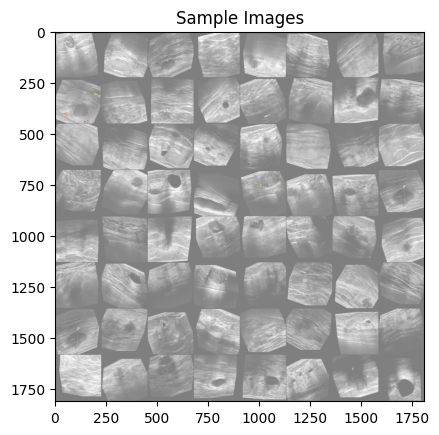

Please check your arguments if you have upgraded adabelief-pytorch from version 0.0.5.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  ---------
adabelief-pytorch=0.0.5  1e-08  False              False
>=0.1.0 (Current 0.2.0)  1e-16  True               True
SGD better than Adam (e.g. CNN for Image Classification)    Adam better than SGD (e.g. Transformer, GAN)
----------------------------------------------------------  ----------------------------------------------
Recommended eps = 1e-8                                      Recommended eps = 1e-16
For a complete table of recommended hyperparameters, see
https://github.com/juntang-zhuang/Adabelief-Optimizer
You can disable the log message by setting "print_change_log = False", though it is recommended to keep as a reminder.

Weight decoupling enabled in AdaBelief
Rectification enabled in AdaBelief


100%|██████████| 8/8 [00:16<00:00,  2.12s/it]


Epoch [1/50], Loss: 1.0912
Epoch [1/50], Class 0 (benign), Accuracy: 72.6619
Epoch [1/50], Class 1 (malignant), Accuracy: 18.0451
Epoch [1/50], Class 2 (normal), Accuracy: 10.8434
New best model saved with accuracy: 57.4803


100%|██████████| 8/8 [00:16<00:00,  2.11s/it]


Epoch [2/50], Loss: 1.0693
Epoch [2/50], Class 0 (benign), Accuracy: 67.2662
Epoch [2/50], Class 1 (malignant), Accuracy: 32.3308
Epoch [2/50], Class 2 (normal), Accuracy: 9.6386
New best model saved with accuracy: 59.0551


100%|██████████| 8/8 [00:16<00:00,  2.11s/it]


Epoch [3/50], Loss: 0.9982
Epoch [3/50], Class 0 (benign), Accuracy: 77.3381
Epoch [3/50], Class 1 (malignant), Accuracy: 40.6015
Epoch [3/50], Class 2 (normal), Accuracy: 15.6627
New best model saved with accuracy: 66.1417


100%|██████████| 8/8 [00:16<00:00,  2.03s/it]


Epoch [4/50], Loss: 0.8750
Epoch [4/50], Class 0 (benign), Accuracy: 75.8993
Epoch [4/50], Class 1 (malignant), Accuracy: 53.3835
Epoch [4/50], Class 2 (normal), Accuracy: 34.9398


100%|██████████| 8/8 [00:16<00:00,  2.10s/it]


Epoch [5/50], Loss: 0.7715
Epoch [5/50], Class 0 (benign), Accuracy: 75.5396
Epoch [5/50], Class 1 (malignant), Accuracy: 69.9248
Epoch [5/50], Class 2 (normal), Accuracy: 36.1446


100%|██████████| 8/8 [00:16<00:00,  2.05s/it]


Epoch [6/50], Loss: 0.7356
Epoch [6/50], Class 0 (benign), Accuracy: 75.8993
Epoch [6/50], Class 1 (malignant), Accuracy: 64.6617
Epoch [6/50], Class 2 (normal), Accuracy: 66.2651


100%|██████████| 8/8 [00:16<00:00,  2.10s/it]


Epoch [7/50], Loss: 0.6227
Epoch [7/50], Class 0 (benign), Accuracy: 75.5396
Epoch [7/50], Class 1 (malignant), Accuracy: 69.9248
Epoch [7/50], Class 2 (normal), Accuracy: 67.4699
New best model saved with accuracy: 69.2913


100%|██████████| 8/8 [00:16<00:00,  2.10s/it]


Epoch [8/50], Loss: 0.5360
Epoch [8/50], Class 0 (benign), Accuracy: 84.1727
Epoch [8/50], Class 1 (malignant), Accuracy: 73.6842
Epoch [8/50], Class 2 (normal), Accuracy: 84.3373
New best model saved with accuracy: 70.0787


100%|██████████| 8/8 [00:17<00:00,  2.16s/it]


Epoch [9/50], Loss: 0.5024
Epoch [9/50], Class 0 (benign), Accuracy: 83.4532
Epoch [9/50], Class 1 (malignant), Accuracy: 75.1880
Epoch [9/50], Class 2 (normal), Accuracy: 79.5181


100%|██████████| 8/8 [00:16<00:00,  2.08s/it]


Epoch [10/50], Loss: 0.4424
Epoch [10/50], Class 0 (benign), Accuracy: 88.8489
Epoch [10/50], Class 1 (malignant), Accuracy: 75.9398
Epoch [10/50], Class 2 (normal), Accuracy: 83.1325


100%|██████████| 8/8 [00:17<00:00,  2.14s/it]


Epoch [11/50], Loss: 0.4483
Epoch [11/50], Class 0 (benign), Accuracy: 87.0504
Epoch [11/50], Class 1 (malignant), Accuracy: 82.7068
Epoch [11/50], Class 2 (normal), Accuracy: 89.1566


100%|██████████| 8/8 [00:16<00:00,  2.06s/it]


Epoch [12/50], Loss: 0.4534
Epoch [12/50], Class 0 (benign), Accuracy: 78.4173
Epoch [12/50], Class 1 (malignant), Accuracy: 84.9624
Epoch [12/50], Class 2 (normal), Accuracy: 83.1325


100%|██████████| 8/8 [00:16<00:00,  2.04s/it]


Epoch [13/50], Loss: 0.4043
Epoch [13/50], Class 0 (benign), Accuracy: 83.8129
Epoch [13/50], Class 1 (malignant), Accuracy: 86.4662
Epoch [13/50], Class 2 (normal), Accuracy: 93.9759


100%|██████████| 8/8 [00:16<00:00,  2.08s/it]


Epoch [14/50], Loss: 0.4062
Epoch [14/50], Class 0 (benign), Accuracy: 89.5683
Epoch [14/50], Class 1 (malignant), Accuracy: 77.4436
Epoch [14/50], Class 2 (normal), Accuracy: 85.5422


100%|██████████| 8/8 [00:16<00:00,  2.03s/it]


Epoch [15/50], Loss: 0.3731
Epoch [15/50], Class 0 (benign), Accuracy: 86.6906
Epoch [15/50], Class 1 (malignant), Accuracy: 88.7218
Epoch [15/50], Class 2 (normal), Accuracy: 85.5422
New best model saved with accuracy: 70.8661


100%|██████████| 8/8 [00:16<00:00,  2.07s/it]


Epoch [16/50], Loss: 0.3676
Epoch [16/50], Class 0 (benign), Accuracy: 89.5683
Epoch [16/50], Class 1 (malignant), Accuracy: 78.9474
Epoch [16/50], Class 2 (normal), Accuracy: 86.7470
New best model saved with accuracy: 72.4409


100%|██████████| 8/8 [00:17<00:00,  2.15s/it]


Epoch [17/50], Loss: 0.2892
Epoch [17/50], Class 0 (benign), Accuracy: 90.2878
Epoch [17/50], Class 1 (malignant), Accuracy: 87.9699
Epoch [17/50], Class 2 (normal), Accuracy: 89.1566
New best model saved with accuracy: 74.8031


100%|██████████| 8/8 [00:16<00:00,  2.05s/it]


Epoch [18/50], Loss: 0.2656
Epoch [18/50], Class 0 (benign), Accuracy: 88.8489
Epoch [18/50], Class 1 (malignant), Accuracy: 86.4662
Epoch [18/50], Class 2 (normal), Accuracy: 92.7711


100%|██████████| 8/8 [00:16<00:00,  2.06s/it]


Epoch [19/50], Loss: 0.2683
Epoch [19/50], Class 0 (benign), Accuracy: 91.7266
Epoch [19/50], Class 1 (malignant), Accuracy: 90.9774
Epoch [19/50], Class 2 (normal), Accuracy: 85.5422


100%|██████████| 8/8 [00:16<00:00,  2.02s/it]


Epoch [20/50], Loss: 0.3797
Epoch [20/50], Class 0 (benign), Accuracy: 89.9281
Epoch [20/50], Class 1 (malignant), Accuracy: 81.9549
Epoch [20/50], Class 2 (normal), Accuracy: 86.7470


100%|██████████| 8/8 [00:16<00:00,  2.04s/it]


Epoch [21/50], Loss: 0.3106
Epoch [21/50], Class 0 (benign), Accuracy: 89.9281
Epoch [21/50], Class 1 (malignant), Accuracy: 87.2180
Epoch [21/50], Class 2 (normal), Accuracy: 91.5663


100%|██████████| 8/8 [00:16<00:00,  2.11s/it]


Epoch [22/50], Loss: 0.3065
Epoch [22/50], Class 0 (benign), Accuracy: 89.2086
Epoch [22/50], Class 1 (malignant), Accuracy: 84.9624
Epoch [22/50], Class 2 (normal), Accuracy: 95.1807


100%|██████████| 8/8 [00:16<00:00,  2.04s/it]


Epoch [23/50], Loss: 0.2839
Epoch [23/50], Class 0 (benign), Accuracy: 91.3669
Epoch [23/50], Class 1 (malignant), Accuracy: 88.7218
Epoch [23/50], Class 2 (normal), Accuracy: 90.3614


100%|██████████| 8/8 [00:16<00:00,  2.05s/it]


Epoch [24/50], Loss: 0.2381
Epoch [24/50], Class 0 (benign), Accuracy: 92.0863
Epoch [24/50], Class 1 (malignant), Accuracy: 88.7218
Epoch [24/50], Class 2 (normal), Accuracy: 92.7711


100%|██████████| 8/8 [00:17<00:00,  2.14s/it]


Epoch [25/50], Loss: 0.2618
Epoch [25/50], Class 0 (benign), Accuracy: 90.2878
Epoch [25/50], Class 1 (malignant), Accuracy: 89.4737
Epoch [25/50], Class 2 (normal), Accuracy: 90.3614


100%|██████████| 8/8 [00:16<00:00,  2.07s/it]


Epoch [26/50], Loss: 0.2827
Epoch [26/50], Class 0 (benign), Accuracy: 89.9281
Epoch [26/50], Class 1 (malignant), Accuracy: 86.4662
Epoch [26/50], Class 2 (normal), Accuracy: 93.9759
New best model saved with accuracy: 75.5906


100%|██████████| 8/8 [00:16<00:00,  2.04s/it]


Epoch [27/50], Loss: 0.2589
Epoch [27/50], Class 0 (benign), Accuracy: 93.1655
Epoch [27/50], Class 1 (malignant), Accuracy: 88.7218
Epoch [27/50], Class 2 (normal), Accuracy: 93.9759


100%|██████████| 8/8 [00:16<00:00,  2.05s/it]


Epoch [28/50], Loss: 0.3334
Epoch [28/50], Class 0 (benign), Accuracy: 89.9281
Epoch [28/50], Class 1 (malignant), Accuracy: 88.7218
Epoch [28/50], Class 2 (normal), Accuracy: 87.9518


100%|██████████| 8/8 [00:16<00:00,  2.12s/it]


Epoch [29/50], Loss: 0.2983
Epoch [29/50], Class 0 (benign), Accuracy: 94.2446
Epoch [29/50], Class 1 (malignant), Accuracy: 87.9699
Epoch [29/50], Class 2 (normal), Accuracy: 83.1325


100%|██████████| 8/8 [00:16<00:00,  2.03s/it]


Epoch [30/50], Loss: 0.1990
Epoch [30/50], Class 0 (benign), Accuracy: 90.6475
Epoch [30/50], Class 1 (malignant), Accuracy: 90.9774
Epoch [30/50], Class 2 (normal), Accuracy: 98.7952


100%|██████████| 8/8 [00:16<00:00,  2.06s/it]


Epoch [31/50], Loss: 0.3561
Epoch [31/50], Class 0 (benign), Accuracy: 93.1655
Epoch [31/50], Class 1 (malignant), Accuracy: 89.4737
Epoch [31/50], Class 2 (normal), Accuracy: 81.9277


100%|██████████| 8/8 [00:16<00:00,  2.04s/it]


Epoch [32/50], Loss: 0.3345
Epoch [32/50], Class 0 (benign), Accuracy: 89.9281
Epoch [32/50], Class 1 (malignant), Accuracy: 84.9624
Epoch [32/50], Class 2 (normal), Accuracy: 92.7711
New best model saved with accuracy: 76.3780


100%|██████████| 8/8 [00:16<00:00,  2.10s/it]


Epoch [33/50], Loss: 0.2723
Epoch [33/50], Class 0 (benign), Accuracy: 91.0072
Epoch [33/50], Class 1 (malignant), Accuracy: 91.7293
Epoch [33/50], Class 2 (normal), Accuracy: 90.3614
New best model saved with accuracy: 77.9528


100%|██████████| 8/8 [00:16<00:00,  2.09s/it]


Epoch [34/50], Loss: 0.2139
Epoch [34/50], Class 0 (benign), Accuracy: 94.2446
Epoch [34/50], Class 1 (malignant), Accuracy: 90.9774
Epoch [34/50], Class 2 (normal), Accuracy: 92.7711


100%|██████████| 8/8 [00:16<00:00,  2.12s/it]


Epoch [35/50], Loss: 0.2585
Epoch [35/50], Class 0 (benign), Accuracy: 92.0863
Epoch [35/50], Class 1 (malignant), Accuracy: 93.9850
Epoch [35/50], Class 2 (normal), Accuracy: 92.7711


100%|██████████| 8/8 [00:16<00:00,  2.06s/it]


Epoch [36/50], Loss: 0.2596
Epoch [36/50], Class 0 (benign), Accuracy: 95.3237
Epoch [36/50], Class 1 (malignant), Accuracy: 86.4662
Epoch [36/50], Class 2 (normal), Accuracy: 90.3614


100%|██████████| 8/8 [00:16<00:00,  2.03s/it]


Epoch [37/50], Loss: 0.1656
Epoch [37/50], Class 0 (benign), Accuracy: 94.9640
Epoch [37/50], Class 1 (malignant), Accuracy: 92.4812
Epoch [37/50], Class 2 (normal), Accuracy: 97.5904


100%|██████████| 8/8 [00:16<00:00,  2.08s/it]


Epoch [38/50], Loss: 0.2499
Epoch [38/50], Class 0 (benign), Accuracy: 92.0863
Epoch [38/50], Class 1 (malignant), Accuracy: 93.9850
Epoch [38/50], Class 2 (normal), Accuracy: 89.1566


100%|██████████| 8/8 [00:16<00:00,  2.06s/it]


Epoch [39/50], Loss: 0.2448
Epoch [39/50], Class 0 (benign), Accuracy: 93.8849
Epoch [39/50], Class 1 (malignant), Accuracy: 89.4737
Epoch [39/50], Class 2 (normal), Accuracy: 91.5663


100%|██████████| 8/8 [00:16<00:00,  2.05s/it]


Epoch [40/50], Loss: 0.1495
Epoch [40/50], Class 0 (benign), Accuracy: 90.2878
Epoch [40/50], Class 1 (malignant), Accuracy: 96.9925
Epoch [40/50], Class 2 (normal), Accuracy: 98.7952


100%|██████████| 8/8 [00:16<00:00,  2.03s/it]


Epoch [41/50], Loss: 0.2045
Epoch [41/50], Class 0 (benign), Accuracy: 94.2446
Epoch [41/50], Class 1 (malignant), Accuracy: 91.7293
Epoch [41/50], Class 2 (normal), Accuracy: 96.3855


100%|██████████| 8/8 [00:16<00:00,  2.05s/it]


Epoch [42/50], Loss: 0.2053
Epoch [42/50], Class 0 (benign), Accuracy: 93.5252
Epoch [42/50], Class 1 (malignant), Accuracy: 90.9774
Epoch [42/50], Class 2 (normal), Accuracy: 93.9759


100%|██████████| 8/8 [00:17<00:00,  2.14s/it]


Epoch [43/50], Loss: 0.2074
Epoch [43/50], Class 0 (benign), Accuracy: 92.0863
Epoch [43/50], Class 1 (malignant), Accuracy: 91.7293
Epoch [43/50], Class 2 (normal), Accuracy: 96.3855


100%|██████████| 8/8 [00:16<00:00,  2.03s/it]


Epoch [44/50], Loss: 0.1399
Epoch [44/50], Class 0 (benign), Accuracy: 93.1655
Epoch [44/50], Class 1 (malignant), Accuracy: 95.4887
Epoch [44/50], Class 2 (normal), Accuracy: 97.5904


100%|██████████| 8/8 [00:16<00:00,  2.06s/it]


Epoch [45/50], Loss: 0.1110
Epoch [45/50], Class 0 (benign), Accuracy: 95.6835
Epoch [45/50], Class 1 (malignant), Accuracy: 96.9925
Epoch [45/50], Class 2 (normal), Accuracy: 98.7952


100%|██████████| 8/8 [00:16<00:00,  2.06s/it]


Epoch [46/50], Loss: 0.0883
Epoch [46/50], Class 0 (benign), Accuracy: 96.7626
Epoch [46/50], Class 1 (malignant), Accuracy: 98.4962
Epoch [46/50], Class 2 (normal), Accuracy: 96.3855


100%|██████████| 8/8 [00:16<00:00,  2.03s/it]


Epoch [47/50], Loss: 0.1186
Epoch [47/50], Class 0 (benign), Accuracy: 95.3237
Epoch [47/50], Class 1 (malignant), Accuracy: 93.9850
Epoch [47/50], Class 2 (normal), Accuracy: 96.3855


100%|██████████| 8/8 [00:16<00:00,  2.11s/it]


Epoch [48/50], Loss: 0.0985
Epoch [48/50], Class 0 (benign), Accuracy: 96.4029
Epoch [48/50], Class 1 (malignant), Accuracy: 96.2406
Epoch [48/50], Class 2 (normal), Accuracy: 97.5904
New best model saved with accuracy: 78.7402


100%|██████████| 8/8 [00:16<00:00,  2.06s/it]


Epoch [49/50], Loss: 0.1998
Epoch [49/50], Class 0 (benign), Accuracy: 94.9640
Epoch [49/50], Class 1 (malignant), Accuracy: 93.9850
Epoch [49/50], Class 2 (normal), Accuracy: 93.9759


100%|██████████| 8/8 [00:16<00:00,  2.07s/it]


Epoch [50/50], Loss: 0.2333
Epoch [50/50], Class 0 (benign), Accuracy: 94.6043
Epoch [50/50], Class 1 (malignant), Accuracy: 87.9699
Epoch [50/50], Class 2 (normal), Accuracy: 90.3614
Finished Training


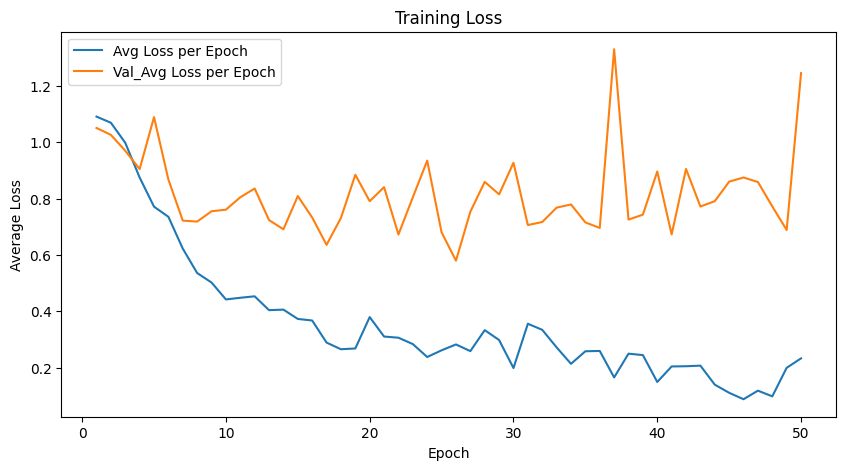

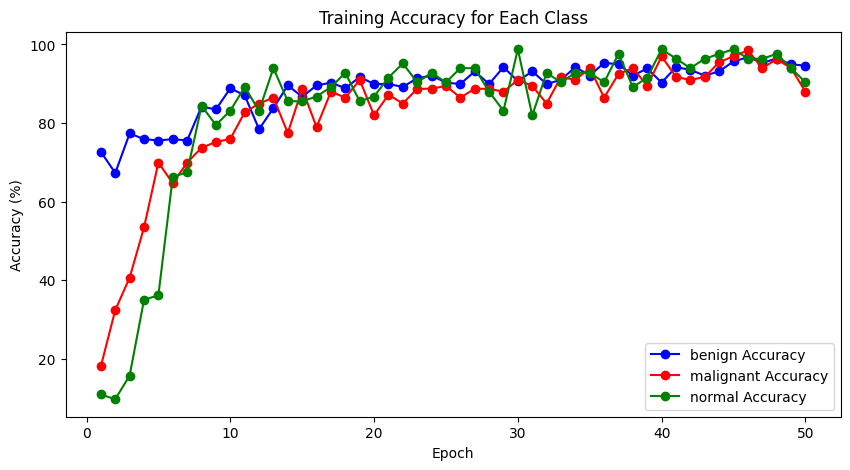

학습에 소요된 시간은 총 : 0시간 16분 43.46436929702759초 입니다.


In [20]:
def main():


  print("Start Code")
  print("My model")

  # model = Simple2DCNN()
#   model = CustomCNN()
#   model = get_model(num_classes=3)
  model = get_model2(num_classes=3)
#   model = get_model3(num_classes=3)
  # model = get_model('resnet', 3, pretrained=False)


  transform = transforms.Compose([
            transforms.Resize((224,224)),
            transforms.ToTensor(),
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.RandomRotation(30),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), shear=10),
  ])

  train_dataset = ImageDataset(directory='/content/dataset/train/',transform=transform)
  val_dataset = ImageDataset(directory='/content/dataset/validation/',transform=transform)

  train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
  val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)

  # 샘플 이미지 출력
  show_sample_images(train_loader)
#   numSample_list=[388, 158, 178]
  numSample_list=[278, 133, 83]

  # print(test_loader)
#   dataiter = iter(train_loader)
#   data_loader, labels = next(iter(train_loader))
#   visualize_batch(data_loader, labels)

  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  tic()
# numSample_list=numSample_list
  train_model(model, train_loader, val_loader, epochs=args.epoch, device=device, numSample_list=numSample_list,args=args)

  toc()


main()

In [ ]:
# #evaluate

# def evaluate_model(model, test_loader, device, args):

#     # 모델 가중치 로드
#     # if args.model_path:
#     #    model.load_state_dict(torch.load("args.model_path.pth", map_location=device))
#     model.load_state_dict(torch.load('checkpoint.pt', map_location=device))

#     model.eval()


#     criterion = nn.CrossEntropyLoss()

#     total = 0
#     correct = 0
#     total_loss = 0.0

#     with torch.no_grad():
#         for inputs, labels in tqdm(test_loader):
#             inputs, labels = inputs.to(device), labels.to(device)

#             outputs = model(inputs)

#             loss = criterion(outputs, labels)

#             total_loss += loss.item()

#             _, predicted = torch.max(outputs.data, 1)

#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()

#     avg_loss = total_loss / len(test_loader)

#     accuracy = correct / total * 100

#     print(f'Test Accuracy: {accuracy:.2f}%, Avg Loss: {avg_loss:.4f}')


#     return accuracy, avg_loss



In [25]:
import torch
import torch.nn as nn
from tqdm import tqdm

def evaluate_model(model, test_loader, device, args):
    # 모델 가중치 로드
    model.load_state_dict(torch.load('best_model.pth', map_location=device))
# checkpoint.pt best_model.pth model_weight_2d.pth

    model.eval()
    criterion = nn.CrossEntropyLoss()

    total = 0
    correct = 0
    total_loss = 0.0

    class_correct = [0] * 3
    class_total = [0] * 3

    with torch.no_grad():
        for inputs, labels in tqdm(test_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            for i in range(len(labels)):
                label = labels[i].item()
                class_correct[label] += (predicted[i] == labels[i]).item()
                class_total[label] += 1

    avg_loss = total_loss / len(test_loader)
    accuracy = correct / total * 100

    print(f'Test Accuracy: {accuracy:.2f}%, Avg Loss: {avg_loss:.4f}')

    # 각 클래스별 정확도 출력
    class_labels = ['benign', 'malignant', 'normal']
    for i in range(3):
        if class_total[i] > 0:
            class_accuracy = 100 * class_correct[i] / class_total[i]
            print(f'Test Accuracy for class {class_labels[i]}: {class_accuracy:.2f}%')
        else:
            print(f'Test Accuracy for class {class_labels[i]}: N/A (no samples)')

    return accuracy, avg_loss


In [26]:
transform = transforms.Compose([
            transforms.Resize((224,224)),
            transforms.ToTensor(),
  ])
test_dataset = ImageDataset(directory='/content/dataset/test/',transform=transform)

test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)



accuracy, avg_loss = evaluate_model(model, test_loader, device=device, args=args)



RuntimeError: Error(s) in loading state_dict for GoogLeNet:
	Missing key(s) in state_dict: "conv1.conv.weight", "conv1.bn.weight", "conv1.bn.bias", "conv1.bn.running_mean", "conv1.bn.running_var", "conv2.conv.weight", "conv2.bn.weight", "conv2.bn.bias", "conv2.bn.running_mean", "conv2.bn.running_var", "conv3.conv.weight", "conv3.bn.weight", "conv3.bn.bias", "conv3.bn.running_mean", "conv3.bn.running_var", "inception3a.branch1.conv.weight", "inception3a.branch1.bn.weight", "inception3a.branch1.bn.bias", "inception3a.branch1.bn.running_mean", "inception3a.branch1.bn.running_var", "inception3a.branch2.0.conv.weight", "inception3a.branch2.0.bn.weight", "inception3a.branch2.0.bn.bias", "inception3a.branch2.0.bn.running_mean", "inception3a.branch2.0.bn.running_var", "inception3a.branch2.1.conv.weight", "inception3a.branch2.1.bn.weight", "inception3a.branch2.1.bn.bias", "inception3a.branch2.1.bn.running_mean", "inception3a.branch2.1.bn.running_var", "inception3a.branch3.0.conv.weight", "inception3a.branch3.0.bn.weight", "inception3a.branch3.0.bn.bias", "inception3a.branch3.0.bn.running_mean", "inception3a.branch3.0.bn.running_var", "inception3a.branch3.1.conv.weight", "inception3a.branch3.1.bn.weight", "inception3a.branch3.1.bn.bias", "inception3a.branch3.1.bn.running_mean", "inception3a.branch3.1.bn.running_var", "inception3a.branch4.1.conv.weight", "inception3a.branch4.1.bn.weight", "inception3a.branch4.1.bn.bias", "inception3a.branch4.1.bn.running_mean", "inception3a.branch4.1.bn.running_var", "inception3b.branch1.conv.weight", "inception3b.branch1.bn.weight", "inception3b.branch1.bn.bias", "inception3b.branch1.bn.running_mean", "inception3b.branch1.bn.running_var", "inception3b.branch2.0.conv.weight", "inception3b.branch2.0.bn.weight", "inception3b.branch2.0.bn.bias", "inception3b.branch2.0.bn.running_mean", "inception3b.branch2.0.bn.running_var", "inception3b.branch2.1.conv.weight", "inception3b.branch2.1.bn.weight", "inception3b.branch2.1.bn.bias", "inception3b.branch2.1.bn.running_mean", "inception3b.branch2.1.bn.running_var", "inception3b.branch3.0.conv.weight", "inception3b.branch3.0.bn.weight", "inception3b.branch3.0.bn.bias", "inception3b.branch3.0.bn.running_mean", "inception3b.branch3.0.bn.running_var", "inception3b.branch3.1.conv.weight", "inception3b.branch3.1.bn.weight", "inception3b.branch3.1.bn.bias", "inception3b.branch3.1.bn.running_mean", "inception3b.branch3.1.bn.running_var", "inception3b.branch4.1.conv.weight", "inception3b.branch4.1.bn.weight", "inception3b.branch4.1.bn.bias", "inception3b.branch4.1.bn.running_mean", "inception3b.branch4.1.bn.running_var", "inception4a.branch1.conv.weight", "inception4a.branch1.bn.weight", "inception4a.branch1.bn.bias", "inception4a.branch1.bn.running_mean", "inception4a.branch1.bn.running_var", "inception4a.branch2.0.conv.weight", "inception4a.branch2.0.bn.weight", "inception4a.branch2.0.bn.bias", "inception4a.branch2.0.bn.running_mean", "inception4a.branch2.0.bn.running_var", "inception4a.branch2.1.conv.weight", "inception4a.branch2.1.bn.weight", "inception4a.branch2.1.bn.bias", "inception4a.branch2.1.bn.running_mean", "inception4a.branch2.1.bn.running_var", "inception4a.branch3.0.conv.weight", "inception4a.branch3.0.bn.weight", "inception4a.branch3.0.bn.bias", "inception4a.branch3.0.bn.running_mean", "inception4a.branch3.0.bn.running_var", "inception4a.branch3.1.conv.weight", "inception4a.branch3.1.bn.weight", "inception4a.branch3.1.bn.bias", "inception4a.branch3.1.bn.running_mean", "inception4a.branch3.1.bn.running_var", "inception4a.branch4.1.conv.weight", "inception4a.branch4.1.bn.weight", "inception4a.branch4.1.bn.bias", "inception4a.branch4.1.bn.running_mean", "inception4a.branch4.1.bn.running_var", "inception4b.branch1.conv.weight", "inception4b.branch1.bn.weight", "inception4b.branch1.bn.bias", "inception4b.branch1.bn.running_mean", "inception4b.branch1.bn.running_var", "inception4b.branch2.0.conv.weight", "inception4b.branch2.0.bn.weight", "inception4b.branch2.0.bn.bias", "inception4b.branch2.0.bn.running_mean", "inception4b.branch2.0.bn.running_var", "inception4b.branch2.1.conv.weight", "inception4b.branch2.1.bn.weight", "inception4b.branch2.1.bn.bias", "inception4b.branch2.1.bn.running_mean", "inception4b.branch2.1.bn.running_var", "inception4b.branch3.0.conv.weight", "inception4b.branch3.0.bn.weight", "inception4b.branch3.0.bn.bias", "inception4b.branch3.0.bn.running_mean", "inception4b.branch3.0.bn.running_var", "inception4b.branch3.1.conv.weight", "inception4b.branch3.1.bn.weight", "inception4b.branch3.1.bn.bias", "inception4b.branch3.1.bn.running_mean", "inception4b.branch3.1.bn.running_var", "inception4b.branch4.1.conv.weight", "inception4b.branch4.1.bn.weight", "inception4b.branch4.1.bn.bias", "inception4b.branch4.1.bn.running_mean", "inception4b.branch4.1.bn.running_var", "inception4c.branch1.conv.weight", "inception4c.branch1.bn.weight", "inception4c.branch1.bn.bias", "inception4c.branch1.bn.running_mean", "inception4c.branch1.bn.running_var", "inception4c.branch2.0.conv.weight", "inception4c.branch2.0.bn.weight", "inception4c.branch2.0.bn.bias", "inception4c.branch2.0.bn.running_mean", "inception4c.branch2.0.bn.running_var", "inception4c.branch2.1.conv.weight", "inception4c.branch2.1.bn.weight", "inception4c.branch2.1.bn.bias", "inception4c.branch2.1.bn.running_mean", "inception4c.branch2.1.bn.running_var", "inception4c.branch3.0.conv.weight", "inception4c.branch3.0.bn.weight", "inception4c.branch3.0.bn.bias", "inception4c.branch3.0.bn.running_mean", "inception4c.branch3.0.bn.running_var", "inception4c.branch3.1.conv.weight", "inception4c.branch3.1.bn.weight", "inception4c.branch3.1.bn.bias", "inception4c.branch3.1.bn.running_mean", "inception4c.branch3.1.bn.running_var", "inception4c.branch4.1.conv.weight", "inception4c.branch4.1.bn.weight", "inception4c.branch4.1.bn.bias", "inception4c.branch4.1.bn.running_mean", "inception4c.branch4.1.bn.running_var", "inception4d.branch1.conv.weight", "inception4d.branch1.bn.weight", "inception4d.branch1.bn.bias", "inception4d.branch1.bn.running_mean", "inception4d.branch1.bn.running_var", "inception4d.branch2.0.conv.weight", "inception4d.branch2.0.bn.weight", "inception4d.branch2.0.bn.bias", "inception4d.branch2.0.bn.running_mean", "inception4d.branch2.0.bn.running_var", "inception4d.branch2.1.conv.weight", "inception4d.branch2.1.bn.weight", "inception4d.branch2.1.bn.bias", "inception4d.branch2.1.bn.running_mean", "inception4d.branch2.1.bn.running_var", "inception4d.branch3.0.conv.weight", "inception4d.branch3.0.bn.weight", "inception4d.branch3.0.bn.bias", "inception4d.branch3.0.bn.running_mean", "inception4d.branch3.0.bn.running_var", "inception4d.branch3.1.conv.weight", "inception4d.branch3.1.bn.weight", "inception4d.branch3.1.bn.bias", "inception4d.branch3.1.bn.running_mean", "inception4d.branch3.1.bn.running_var", "inception4d.branch4.1.conv.weight", "inception4d.branch4.1.bn.weight", "inception4d.branch4.1.bn.bias", "inception4d.branch4.1.bn.running_mean", "inception4d.branch4.1.bn.running_var", "inception4e.branch1.conv.weight", "inception4e.branch1.bn.weight", "inception4e.branch1.bn.bias", "inception4e.branch1.bn.running_mean", "inception4e.branch1.bn.running_var", "inception4e.branch2.0.conv.weight", "inception4e.branch2.0.bn.weight", "inception4e.branch2.0.bn.bias", "inception4e.branch2.0.bn.running_mean", "inception4e.branch2.0.bn.running_var", "inception4e.branch2.1.conv.weight", "inception4e.branch2.1.bn.weight", "inception4e.branch2.1.bn.bias", "inception4e.branch2.1.bn.running_mean", "inception4e.branch2.1.bn.running_var", "inception4e.branch3.0.conv.weight", "inception4e.branch3.0.bn.weight", "inception4e.branch3.0.bn.bias", "inception4e.branch3.0.bn.running_mean", "inception4e.branch3.0.bn.running_var", "inception4e.branch3.1.conv.weight", "inception4e.branch3.1.bn.weight", "inception4e.branch3.1.bn.bias", "inception4e.branch3.1.bn.running_mean", "inception4e.branch3.1.bn.running_var", "inception4e.branch4.1.conv.weight", "inception4e.branch4.1.bn.weight", "inception4e.branch4.1.bn.bias", "inception4e.branch4.1.bn.running_mean", "inception4e.branch4.1.bn.running_var", "inception5a.branch1.conv.weight", "inception5a.branch1.bn.weight", "inception5a.branch1.bn.bias", "inception5a.branch1.bn.running_mean", "inception5a.branch1.bn.running_var", "inception5a.branch2.0.conv.weight", "inception5a.branch2.0.bn.weight", "inception5a.branch2.0.bn.bias", "inception5a.branch2.0.bn.running_mean", "inception5a.branch2.0.bn.running_var", "inception5a.branch2.1.conv.weight", "inception5a.branch2.1.bn.weight", "inception5a.branch2.1.bn.bias", "inception5a.branch2.1.bn.running_mean", "inception5a.branch2.1.bn.running_var", "inception5a.branch3.0.conv.weight", "inception5a.branch3.0.bn.weight", "inception5a.branch3.0.bn.bias", "inception5a.branch3.0.bn.running_mean", "inception5a.branch3.0.bn.running_var", "inception5a.branch3.1.conv.weight", "inception5a.branch3.1.bn.weight", "inception5a.branch3.1.bn.bias", "inception5a.branch3.1.bn.running_mean", "inception5a.branch3.1.bn.running_var", "inception5a.branch4.1.conv.weight", "inception5a.branch4.1.bn.weight", "inception5a.branch4.1.bn.bias", "inception5a.branch4.1.bn.running_mean", "inception5a.branch4.1.bn.running_var", "inception5b.branch1.conv.weight", "inception5b.branch1.bn.weight", "inception5b.branch1.bn.bias", "inception5b.branch1.bn.running_mean", "inception5b.branch1.bn.running_var", "inception5b.branch2.0.conv.weight", "inception5b.branch2.0.bn.weight", "inception5b.branch2.0.bn.bias", "inception5b.branch2.0.bn.running_mean", "inception5b.branch2.0.bn.running_var", "inception5b.branch2.1.conv.weight", "inception5b.branch2.1.bn.weight", "inception5b.branch2.1.bn.bias", "inception5b.branch2.1.bn.running_mean", "inception5b.branch2.1.bn.running_var", "inception5b.branch3.0.conv.weight", "inception5b.branch3.0.bn.weight", "inception5b.branch3.0.bn.bias", "inception5b.branch3.0.bn.running_mean", "inception5b.branch3.0.bn.running_var", "inception5b.branch3.1.conv.weight", "inception5b.branch3.1.bn.weight", "inception5b.branch3.1.bn.bias", "inception5b.branch3.1.bn.running_mean", "inception5b.branch3.1.bn.running_var", "inception5b.branch4.1.conv.weight", "inception5b.branch4.1.bn.weight", "inception5b.branch4.1.bn.bias", "inception5b.branch4.1.bn.running_mean", "inception5b.branch4.1.bn.running_var", "fc.weight", "fc.bias". 
	Unexpected key(s) in state_dict: "features.0.weight", "features.0.bias", "features.2.weight", "features.2.bias", "features.5.weight", "features.5.bias", "features.7.weight", "features.7.bias", "features.10.weight", "features.10.bias", "features.12.weight", "features.12.bias", "features.14.weight", "features.14.bias", "features.16.weight", "features.16.bias", "features.19.weight", "features.19.bias", "features.21.weight", "features.21.bias", "features.23.weight", "features.23.bias", "features.25.weight", "features.25.bias", "features.28.weight", "features.28.bias", "features.30.weight", "features.30.bias", "features.32.weight", "features.32.bias", "features.34.weight", "features.34.bias", "classifier.0.weight", "classifier.0.bias", "classifier.3.weight", "classifier.3.bias", "classifier.6.weight", "classifier.6.bias". 